/home/juan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


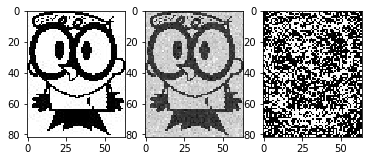

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import copy


def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im)
    im2[index] = 1-im2[index]
    return im2
# proportion of pixels to alter
prop = 0.7
varSigma = 0.1
im = misc.imread('images/dexter.jpg')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')



In [8]:
def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]
        return n
    if size==8:
        print('Not yet implemented\n')
        return -1

In [ ]:
def binaryImage(image):
    cp_image = copy.deepcopy(image)
    for x in range(len(cp_image)):
        for y in range(len(cp_image[0])):
            val = round(cp_image[x][y])
            if val == 1:
                cp_image[x][y] = 1
            else:
                cp_image[x][y] = -1
    return cp_image
    
def calculateEnergy(image, original, h, beta, eta):
    part1 = 0
    part2 = 0
    part3 = 0
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            part1 += image[i][j]
            part3 += image[i][j] * original[i][j]
            n = neighbours(i, j, image.shape[0], image.shape[1])
            counter = image[i][j] * 1 
            for m in n:
                x, y =  m
                counter = counter * image[x][y]
            part2 += counter            
    energy = (h * part1) - (beta * part2) - (eta * part3)
    return energy
    
        
    
    


def ICM(image):
    binary = binaryImage(image)
    changedImage = copy.deepcopy(binary)
    plt.imshow(binary, cmap='Greys')

    for n in range(5):
        print(n)
        for i in range(image.shape[0]):
            print(i)
            previousIter = calculateEnergy(changedImage, binary, 0, 0.1, 0.02)
            for j in range(image.shape[1]):
                a = copy.deepcopy(changedImage)
                a[i][j] = a[i][j]*-1
                thisIter = calculateEnergy(a, binary, 0, 0.1, 0.02)
                if  thisIter > previousIter:
                    changedImage = a
                    previousIter = thisIter
    plt.imshow(changedImage, cmap='Greys')
    

        
        
#     print(calculateEnergy(binary, binary, 0,0.1,0.02))
    

ICM(im2)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
1
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
